In [1]:
import seaborn as sns
sns.set_style('white')

In [2]:
printfig = False

In [3]:
def get_month(index):
    return index.month

In [4]:
def get_mowy(index):
    '''get month of water year'''
    month = index.month
    if month == 10:
        return 1
    if month == 11:
        return 2
    if month == 12:
        return 3
    if month == 1:
        return 4
    if month == 2:
        return 5
    if month == 3:
        return 6
    if month == 4:
        return 7
    if month == 5:
        return 8
    if month == 6:
        return 9
    if month == 7:
        return 10
    if month == 8:
        return 11
    if month == 9:
        return 12

In [5]:
months_as_water_year = ['10','11','12','1','2','3','4','5','6','7','8','9']

## First look at Change in Land Cover and Change in Forcings Together

In [6]:
df = pd.read_pickle('./data/experiment_results_v6.pcl')

In [7]:
cont = df.loc[df.decade == 0]

In [8]:
df.columns

Index([u'index', u'track', u'scenario', u'year', u'decade', u'name', u'idx',
       u'R_P', u'LAI', u'R_Pmin', u'R_Pmax', u'Q', u'L', u'P', u'SWE', u'ET',
       u'leakage', u'streamflow', u'et', u'trans', u'snow_sub', u'snowfall',
       u'precip', u'evap', u'root_storage', u'pet', u'swe', u'snowmelt',
       u'annualQ', u'annualP', u'krumlai', u'krumweight'],
      dtype='object')

In [9]:
len(cont)

6

In [10]:
len(df)

126

In [11]:
LP = df.loc[(df.track=='PGW_LP') & (df.name == 'FLC_LP_FT')]
MP = df.loc[(df.track=='PGW_MP') & (df.name == 'FLC_MP_FT')]

In [12]:
LP = pd.concat([cont,LP]).groupby('year')
MP = pd.concat([cont,MP]).groupby('year')

In [13]:
MP.mean().columns

Index([u'index', u'scenario', u'decade', u'idx', u'R_P', u'LAI', u'R_Pmin',
       u'R_Pmax', u'Q', u'L', u'P', u'SWE', u'ET', u'krumlai', u'krumweight'],
      dtype='object')

In [14]:
var = 'Q'
year = 2100
print ((MP.mean()[var].round(2)-MP.mean()[var].round(2)[2000])/MP.mean()[var].round(2)[2000] * 100)
print ((LP.mean()[var].round(2)-LP.mean()[var].round(2)[2000])/LP.mean()[var].round(2)[2000] * 100)

year
2000      0.000000
2010    171.761658
2020    174.870466
2030    176.683938
2040    179.533679
2050    182.901554
2060    187.046632
2070    195.336788
2080    203.108808
2090    213.730570
2100    216.062176
Name: Q, dtype: float64
year
2000      0.000000
2010    172.020725
2020    184.455959
2030    173.316062
2040    176.165803
2050    175.647668
2060    179.274611
2070    183.678756
2080    191.191710
2090    193.005181
2100    196.373057
Name: Q, dtype: float64


In [15]:
var = 'SWE'
year = 2100
print ((MP.mean()[var].round(2)-MP.mean()[var].round(2)[2000]))
print ((LP.mean()[var].round(2)-LP.mean()[var].round(2)[2000]))

year
2000       0.00
2010    1274.99
2020    1231.77
2030    1159.10
2040    1094.99
2050    1026.84
2060     982.12
2070     984.21
2080     973.26
2090     968.65
2100     851.67
Name: SWE, dtype: float64
year
2000       0.00
2010    1273.28
2020    1566.80
2030    1144.15
2040    1085.46
2050     981.74
2060     935.61
2070     902.30
2080     900.28
2090     798.99
2100     717.15
Name: SWE, dtype: float64


In [16]:
(MP.mean().R_P.round(2)-MP.mean().R_P.round(2)[2000])/MP.mean().R_P.round(2)[2000] * 100

year
2000     0.000000
2010     6.896552
2020    10.344828
2030    10.344828
2040    10.344828
2050    10.344828
2060    10.344828
2070    10.344828
2080     6.896552
2090     6.896552
2100     6.896552
Name: R_P, dtype: float64

In [17]:
(LP.mean().R_P.round(2)-LP.mean().R_P.round(2)[2000])/LP.mean().R_P.round(2)[2000] * 100

year
2000     0.000000
2010    10.344828
2020     6.896552
2030    10.344828
2040    10.344828
2050    10.344828
2060    10.344828
2070    10.344828
2080    10.344828
2090    10.344828
2100    10.344828
Name: R_P, dtype: float64

In [18]:
MP.mean().R_P.round(2)

year
2000    0.29
2010    0.31
2020    0.32
2030    0.32
2040    0.32
2050    0.32
2060    0.32
2070    0.32
2080    0.31
2090    0.31
2100    0.31
Name: R_P, dtype: float64

In [19]:
LP.mean().R_P.round(2)

year
2000    0.29
2010    0.32
2020    0.31
2030    0.32
2040    0.32
2050    0.32
2060    0.32
2070    0.32
2080    0.32
2090    0.32
2100    0.32
Name: R_P, dtype: float64

In [20]:
print round((5.85-5.01)/5.01*100)
print round((5.96-5.01)/5.01*100)
print ''

17.0
19.0



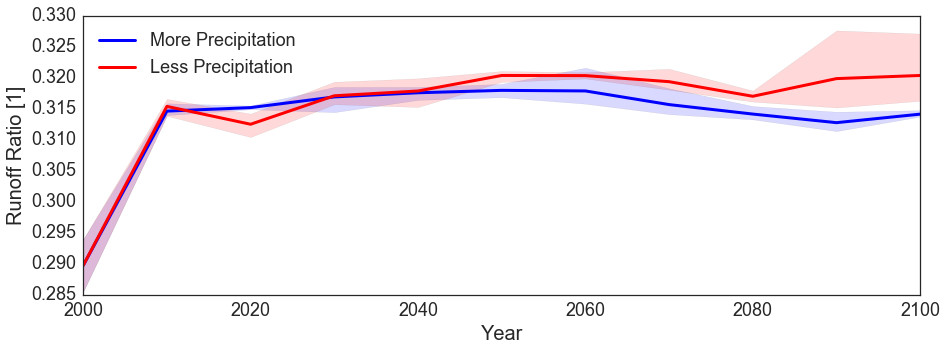

In [21]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().R_P, label='More Precipitation',c='b',lw=3)
plt.fill_between(MP.min().index,MP.min().R_P,MP.max().R_P,facecolor='b',alpha=0.15)
plt.plot(LP.mean().R_P, label='Less Precipitation',c='r',lw=3)
plt.fill_between(LP.min().index,LP.min().R_P,LP.max().R_P,facecolor='r',alpha=0.15)
plt.ylabel('Runoff Ratio [1]', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=18)
ax = plt.gca()
[tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_runoff_ratio_v2.png',dpi=300,bbox_inches='tight')

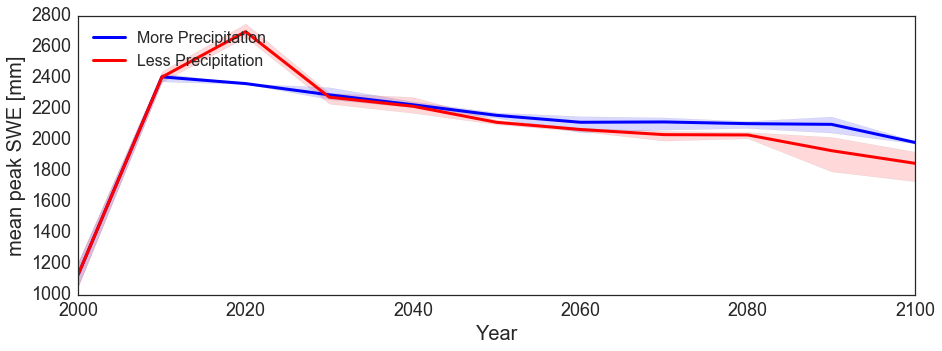

In [22]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().SWE, label='More Precipitation',c='b',lw=3)
plt.fill_between(MP.min().index,MP.min().SWE,MP.max().SWE,facecolor='b',alpha=0.15)
plt.plot(LP.mean().SWE, label='Less Precipitation',c='r',lw=3)
plt.fill_between(LP.min().index,LP.min().SWE,LP.max().SWE,facecolor='r',alpha=0.15)
plt.ylabel('mean peak SWE [mm]', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=16)
ax = plt.gca()
[tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_mean_peakSWE_v2.png',dpi=300,bbox_inches='tight')

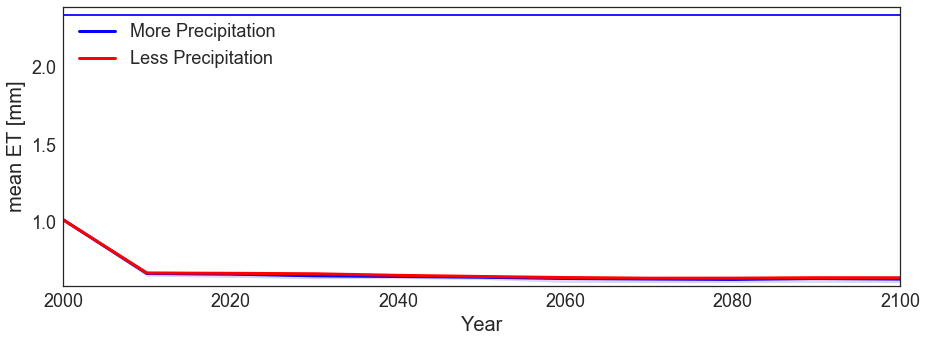

In [23]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().ET, label='More Precipitation',c='b',lw=3)
plt.fill_between(MP.min().index,MP.min().ET,MP.max().ET,facecolor='b',alpha=0.15)
plt.plot(LP.mean().ET, label='Less Precipitation',c='r',lw=3)
plt.fill_between(LP.min().index,LP.min().ET,LP.max().ET,facecolor='r',alpha=0.15)
plt.ylabel('mean ET [mm]', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=18)
plt.axhline(2.35)
ax = plt.gca()
[tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_mean_ET_v2.png',dpi=300,bbox_inches='tight')

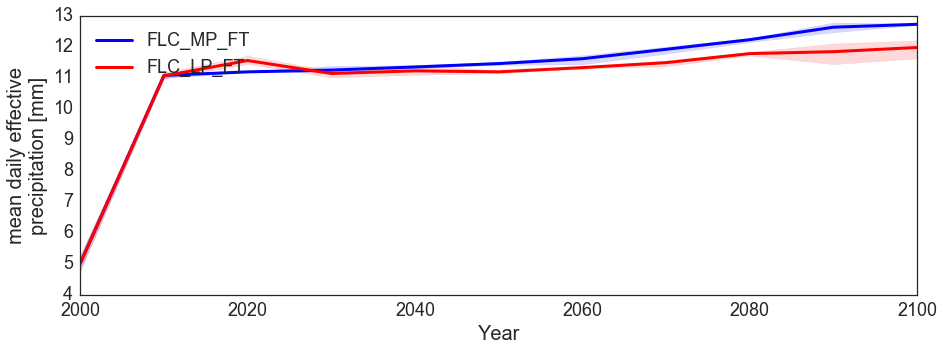

In [24]:
fig = plt.figure(figsize=(15,5))

plt.plot(MP.mean().P, label='FLC_MP_FT',c='b',lw=3)
plt.fill_between(MP.min().index,MP.min().P,MP.max().P,facecolor='b',alpha=0.15)
plt.plot(LP.mean().P, label='FLC_LP_FT',c='r',lw=3)
plt.fill_between(LP.min().index,LP.min().P,LP.max().P,facecolor='r',alpha=0.15)
plt.ylabel('mean daily effective\nprecipitation [mm]', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.legend(loc='upper left', fontsize=18)
ax = plt.gca()
[tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];
if printfig: plt.savefig('./figures/experiment_mean_P_v2.png',dpi=300,bbox_inches='tight')

In [25]:
QP_change_mean = pd.DataFrame()
QP_change_min = pd.DataFrame()
QP_change_max = pd.DataFrame()

In [26]:
control = MP.mean().loc[MP.mean().index==2000]['R_P'].as_matrix()[0]
QP_change_mean['PGW_MP']=((MP.mean()['R_P']/control)*100-100).round(1)
control = LP.mean().loc[LP.mean().index==2000]['R_P'].as_matrix()[0]
QP_change_mean['PGW_LP']=((LP.mean()['R_P']/control)*100-100).round(1)

In [27]:
control = MP.min().loc[MP.min().index==2000]['R_P'].as_matrix()[0]
QP_change_min['PGW_MP']=((MP.min()['R_P']/control)*100-100).round(1)
control = LP.min().loc[LP.min().index==2000]['R_P'].as_matrix()[0]
QP_change_min['PGW_LP']=((LP.min()['R_P']/control)*100-100).round(1)

In [28]:
control = MP.max().loc[MP.max().index==2000]['R_P'].as_matrix()[0]
QP_change_max['PGW_MP']=((MP.max()['R_P']/control)*100-100).round(1)
control = LP.max().loc[LP.max().index==2000]['R_P'].as_matrix()[0]
QP_change_max['PGW_LP']=((LP.max()['R_P']/control)*100-100).round(1)

In [29]:
QP_change_mean

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2010,8.6,8.9
2020,8.8,7.9
2030,9.4,9.4
2040,9.6,9.7
2050,9.7,10.6
2060,9.7,10.6
2070,9.0,10.2
2080,8.4,9.4


In [30]:
QP_change_min

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2010,10.0,9.9
2020,10.3,8.7
2030,10.1,10.6
2040,10.8,10.4
2050,11.0,11.8
2060,10.6,12.0
2070,10.0,11.4
2080,9.7,10.7


In [31]:
QP_change_max

,PGW_MP,PGW_LP
year,,
2000,0.0,0.0
2010,7.5,7.7
2020,7.3,6.9
2030,8.4,8.6
2040,8.4,8.8
2050,8.5,9.2
2060,9.4,9.2
2070,8.3,9.4
2080,7.3,8.2


### Compute Annual Hydrographs

In [32]:
strt = '1993-10-1'
nd = '2013-9-30'

In [33]:
dates = pd.date_range(strt,nd)
dowy = dates.map(rut.DOWY)

In [34]:
LP = df.loc[(df.track=='PGW_LP') & (df.name == 'FLC_LP_FT')]
MP = df.loc[(df.track=='PGW_MP') & (df.name == 'FLC_MP_FT')]
tmp = pd.concat([LP,MP,cont])
tmp.reset_index(inplace=True)

In [35]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['trans'] = tmp.trans[i]
    out['snow_sub'] = tmp.snow_sub[i]
    out['snowfall'] = tmp.snowfall[i]
    out['precip'] = tmp.precip[i]
    out['evap'] = tmp.evap[i]
    out['leakage'] = tmp.leakage[i]
    out['root_storage'] = tmp.root_storage[i]
    out['swe'] = tmp.swe[i]
    out['snowmelt'] = tmp.snowmelt[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

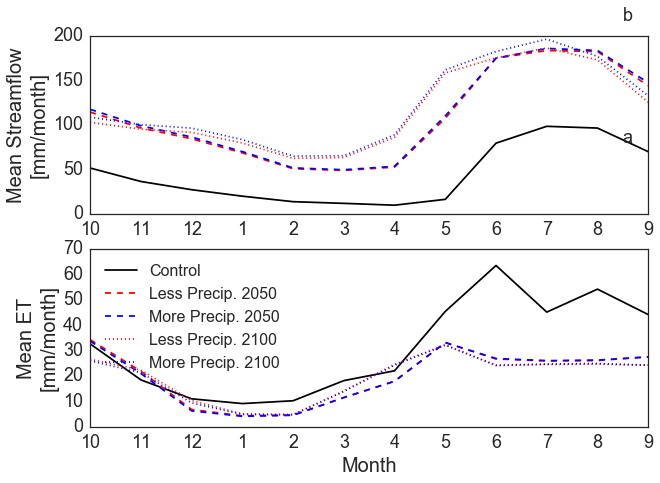

In [36]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plt.sca(ax1)
dat.loc[dat.year==2000].groupby('month').mean()['sf'].plot(c='k', label = 'Control',ax=ax1)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()['sf'].plot(label='Less Precip. 2050',
                                                                        c='r',ls='--',ax=ax1)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()['sf'].plot(label='More Precip. 2050',
                                                                        c='b',ls='--',ax=ax1)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()['sf'].plot(label='Less Precip. 2100',
                                                                        c='r',ls=':',ax=ax1)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()['sf'].plot(label='More Precip. 2100',
                                                                        c='b',ls=':',ax=ax1)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 20)
plt.xlabel('', fontsize = 16)
#plt.legend(loc='upper left', fontsize = 18)
plt.text(11.5,80,'a',fontsize=18)

plt.sca(ax2)
dat.loc[dat.year==2000].groupby('month').mean()['et'].plot(c='k', label = 'Control',ax=ax2)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()['et'].plot(label='Less Precip. 2050',
                                                                        c='r',ls='--',ax=ax2)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()['et'].plot(label='More Precip. 2050',
                                                                        c='b',ls='--',ax=ax2)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()['et'].plot(label='Less Precip. 2100',
                                                                        c='r',ls=':',ax=ax2)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()['et'].plot(label='More Precip. 2100',
                                                                        c='b',ls=':',ax=ax2)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 20)
plt.xlabel('Month', fontsize = 20)
plt.legend(loc='upper left', fontsize = 16)
plt.text(11.5,160,'b',fontsize=18)

for ax in [ax1,ax2]:
    [tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
    [tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];

if printfig: plt.savefig('./figures/FLC_sf_et_monthly.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_sf_et_monthly.pdf',bbox_inches='tight')

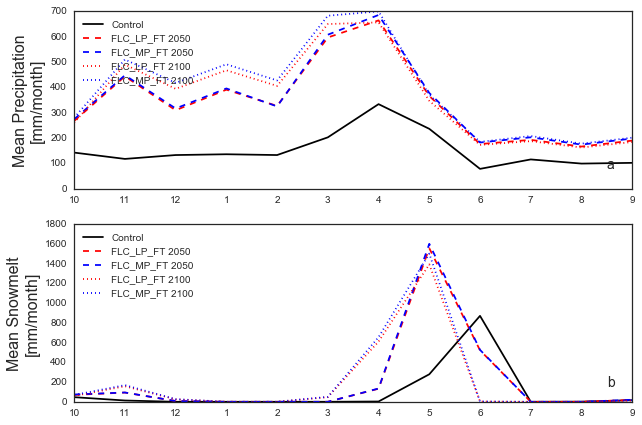

In [37]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plt.sca(ax1)
dat.loc[dat.year==2000].groupby('month').mean()['precip'].plot(c='k', label = 'Control',ax=ax1)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()['precip'].plot(label='FLC_LP_FT 2050',
                                                                        c='r',ls='--',ax=ax1)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()['precip'].plot(label='FLC_MP_FT 2050',
                                                                        c='b',ls='--',ax=ax1)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()['precip'].plot(label='FLC_LP_FT 2100',
                                                                        c='r',ls=':',ax=ax1)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()['precip'].plot(label='FLC_MP_FT 2100',
                                                                        c='b',ls=':',ax=ax1)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.ylabel('Mean Precipitation\n[mm/month]', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.legend(loc='upper left')
plt.text(11.5,80,'a',fontsize=14)

plt.sca(ax2)
dat.loc[dat.year==2000].groupby('month').mean()['snowmelt'].plot(c='k', label = 'Control',ax=ax2)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()['snowmelt'].plot(label='FLC_LP_FT 2050',
                                                                        c='r',ls='--',ax=ax2)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()['snowmelt'].plot(label='FLC_MP_FT 2050',
                                                                        c='b',ls='--',ax=ax2)

dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()['snowmelt'].plot(label='FLC_LP_FT 2100',
                                                                        c='r',ls=':',ax=ax2)
dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()['snowmelt'].plot(label='FLC_MP_FT 2100',
                                                                        c='b',ls=':',ax=ax2)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.ylabel('Mean Snowmelt\n[mm/month]', fontsize = 16)
plt.xlabel('', fontsize = 16)
plt.legend(loc='upper left')
plt.text(11.5,160,'b',fontsize=14)
if printfig: plt.savefig('./figures/FLC_p_swe_monthly.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_p_swe_monthly.pdf',bbox_inches='tight')

In [38]:
def make_table(var):
    table = pd.DataFrame()
    
    table['Control'] = dat.loc[(dat.year==2000) & (dat.name == 'CLC_CP_CT')].groupby('month').mean()[var]
    for decade in np.arange(0,11):
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['FLC_LP_FT_%s'%year] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==decade)].groupby('month').mean()[var]
        table['FLC_MP_FT_%s'%year] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_MP_%s'%year] = table['FLC_MP_FT_%s'%year]-table['Control']
        table['delta_LP_%s'%year] = table['FLC_LP_FT_%s'%year]-table['Control']
        table['percent_MP_%s'%year] = (table['delta_MP_%s'%year]/table['Control'])*100.
        table['percent_LP_%s'%year] = (table['delta_LP_%s'%year]/table['Control'])*100.
        

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC_LP_FT_2100']; del table['FLC_MP_FT_2100'];
    return table

In [39]:
def make_table_monthly(var):
    table = pd.DataFrame()
    
    table['Control'] = dat.loc[(dat.year==2000) & (dat.name == 'CLC_CP_CT')].groupby('month').mean()[var]
    for decade in [5,10]:
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['FLC_LP_FT_%s'%year] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==decade)].groupby('month').mean()[var]
        table['FLC_MP_FT_%s'%year] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_MP_%s'%year] = table['FLC_MP_FT_%s'%year]-table['Control']
        table['delta_LP_%s'%year] = table['FLC_LP_FT_%s'%year]-table['Control']
        table['percent_MP_%s'%year] = (table['delta_MP_%s'%year]/table['Control'])*100.
        table['percent_LP_%s'%year] = (table['delta_LP_%s'%year]/table['Control'])*100.
        

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC_LP_FT_2100']; del table['FLC_MP_FT_2100'];
    return table

In [40]:
def monthplot(var,letter,title,ax,filt):
    mat = np.zeros((4,12))
    ct = 0
    labs = []
    for year in ['2050','2100']:
        for track in ['MP','LP']:
            tab = make_table_monthly(var).filter(regex='%s*'%filt)
            mat[ct,:] = tab['%s_%s_%s'%(filt,track,year)].as_matrix()
            labs.append('FLC_%s_FT_%s'%(track,year))
            ct += 1
    mat = np.flipud(mat)
    labs = list(reversed(labs))

    #plt.figure(figsize=(12,3.5))
    highval = np.max([np.abs(np.min(mat)),np.abs(np.max(mat))])
    vmin = highval*-1.
    vmax = highval
    
    plt.sca(ax)
    plt.pcolor(mat,vmin=vmin,vmax=vmax,cmap='coolwarm_r',edgecolor='k',lw=1.5)
    cb = plt.colorbar()
    plt.ylim(0,4)
    plt.axis('equal')
    plt.yticks(np.arange(0.5,4.5,1))
    plt.xticks(np.arange(0.5,12.5,1))
    ax.set_yticklabels(labs, fontsize=14,fontweight='bold');
    ax.set_xticklabels(months_as_water_year,fontsize=14)
    ax.set_xlabel('Month', fontsize=16, fontweight='bold')
    plt.box(on=None)
    cb.ax.tick_params(labelsize=14)
    if filt == 'delta': cb.set_label(label = 'Difference from\n control [mm/month]',fontsize=18)
    if filt == 'percent': cb.set_label(label = 'Difference from\n control [%]',fontsize=18)
    plt.title('%s) %s'%(letter,title), fontsize=18)

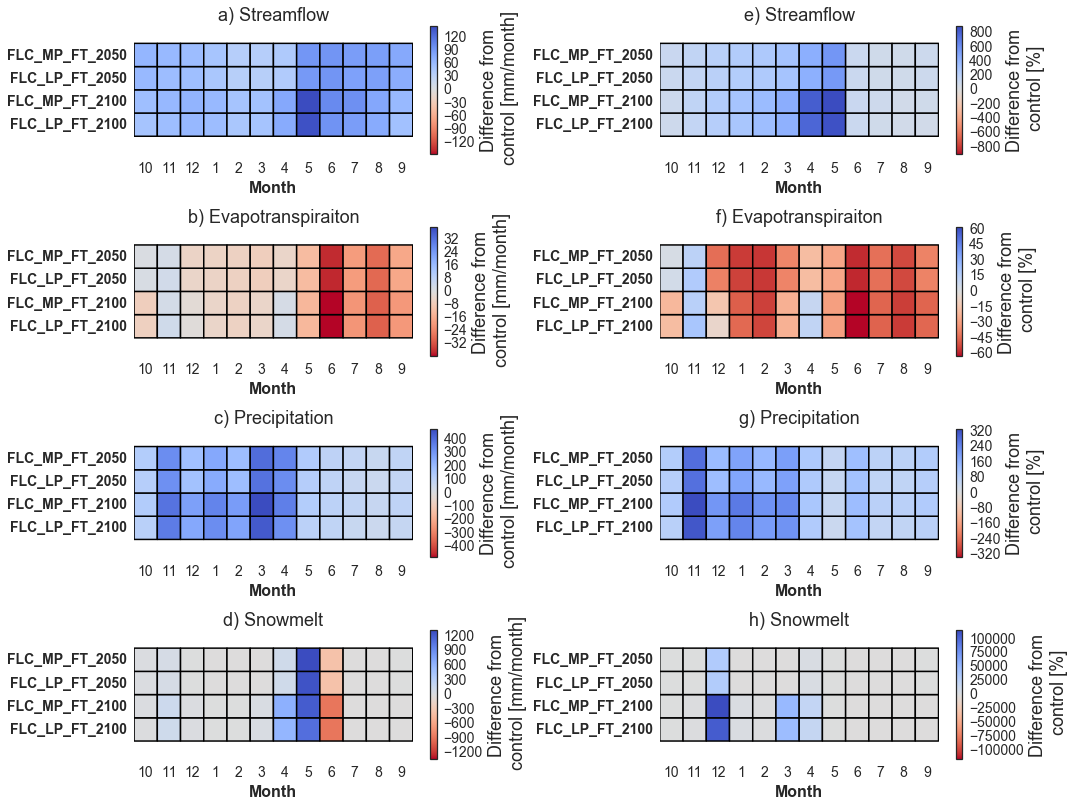

In [41]:
variables = ['sf','et','precip','snowmelt']
letters = ['a','b','c','d']
titles = ['Streamflow','Evapotranspiraiton','Precipitation','Snowmelt']
n = len(variables)
fig = plt.figure(figsize=(15,5.5*n))

ax1 = fig.add_subplot(821)
ax2 = fig.add_subplot(823)
ax3 = fig.add_subplot(825)
ax4 = fig.add_subplot(827)
axes = [ax1,ax2,ax3,ax4]

for var,letter,title,ax in zip(variables,letters,titles,axes):
    monthplot(var,letter,title,ax,'delta')

ax1 = fig.add_subplot(822)
ax2 = fig.add_subplot(824)
ax3 = fig.add_subplot(826)
ax4 = fig.add_subplot(828)
axes = [ax1,ax2,ax3,ax4]
letters = ['e','f','g','h']

for var,letter,title,ax in zip(variables,letters,titles,axes):
    monthplot(var,letter,title,ax,'percent')

plt.tight_layout()
#printfig = True
if printfig: plt.savefig('./figures/monthly_change.pdf',bbox_inches='tight')
if printfig: plt.savefig('./figures/monthly_change.png',dpi=300,bbox_inches='tight')
#printfig=False

In [42]:
var = 'sf'
filt ='delta'
year = '2100'
pd.DataFrame({var:make_table_monthly('sf').filter(regex='%s*'%filt).filter(regex=year).mean(axis=1).as_matrix()},
             index=months_as_water_year)

,sf
10,54.390962
11,61.471834
12,66.997124
1,61.793349
2,50.070091
3,52.646316
4,77.886611
5,144.120941
6,99.679327
7,93.150612


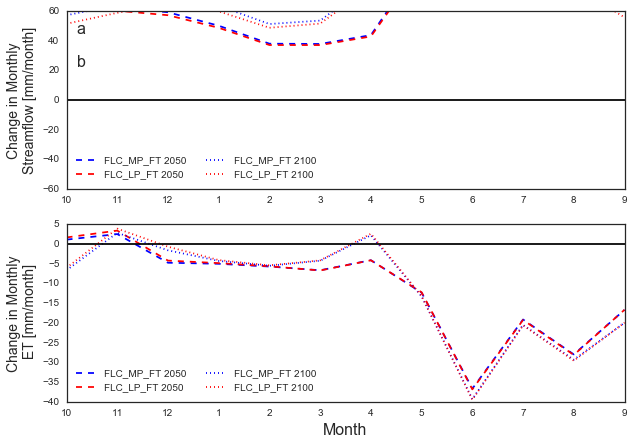

In [43]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

table = make_table('sf')

plt.sca(ax1)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax1)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax1)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
plt.ylim(-60,60)
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\nStreamflow [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,45,'a',fontsize=16)

table = make_table('et')

plt.sca(ax2)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax2)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax2)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
#plt.ylim(-1.7,1.7)
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\n ET [mm/month]',fontsize=14)
plt.xlabel('Month', fontsize=16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,45,'b',fontsize=16)
#printfig = True
if printfig: plt.savefig('./figures/FLC_absolute_sf_et_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_absolute_sf_et_change.pdf',bbox_inches='tight')
#printfig = True

In [44]:
table

,Control,FLC_LP_FT_2000,FLC_MP_FT_2000,delta_MP_2000,delta_LP_2000,percent_MP_2000,percent_LP_2000,FLC_LP_FT_2010,FLC_MP_FT_2010,delta_MP_2010,...,delta_MP_2090,delta_LP_2090,percent_MP_2090,percent_LP_2090,FLC_LP_FT_2100,FLC_MP_FT_2100,delta_MP_2100,delta_LP_2100,percent_MP_2100,percent_LP_2100
month,,,,,,,,,,,,,,,,,,,,,
1,32.680397,NaN,NaN,NaN,NaN,NaN,NaN,44.005840,43.494468,10.814070,...,-5.070309,-4.584329,-15.514831,-14.027764,26.640735,26.019377,-6.661021,-6.039662,-20.382312,-18.480993
2,18.488890,NaN,NaN,NaN,NaN,NaN,NaN,19.365948,18.956008,0.467117,...,2.664094,4.091327,14.409159,22.128572,22.376359,21.315148,2.826257,3.887469,15.286245,21.025970
3,11.031989,NaN,NaN,NaN,NaN,NaN,NaN,4.641180,4.441775,-6.590214,...,-2.813305,-1.528052,-25.501339,-13.851100,10.344671,9.422704,-1.609285,-0.687318,-14.587440,-6.230231
4,9.160059,NaN,NaN,NaN,NaN,NaN,NaN,3.772520,3.730648,-5.429411,...,-4.915159,-4.463515,-53.658593,-48.728015,5.083126,4.860707,-4.299352,-4.076933,-46.935856,-44.507712
5,10.269666,NaN,NaN,NaN,NaN,NaN,NaN,4.283137,4.312220,-5.957446,...,-5.738583,-5.525418,-55.878963,-53.803287,4.858261,4.746550,-5.523116,-5.411405,-53.780873,-52.693098
6,18.209508,NaN,NaN,NaN,NaN,NaN,NaN,10.062256,10.153777,-8.055732,...,-5.145276,-5.014423,-28.255985,-27.537391,14.056158,13.965415,-4.244094,-4.153350,-23.307020,-22.808689
7,22.086689,NaN,NaN,NaN,NaN,NaN,NaN,14.896615,14.971076,-7.115612,...,0.510095,0.736287,2.309513,3.333625,24.673245,24.287531,2.200842,2.586556,9.964563,11.710928
8,45.494258,NaN,NaN,NaN,NaN,NaN,NaN,30.239338,30.139798,-15.354460,...,-12.226927,-12.474248,-26.875758,-27.419390,32.290978,32.214708,-13.279550,-13.203280,-29.189508,-29.021860
9,63.593483,NaN,NaN,NaN,NaN,NaN,NaN,29.941341,29.941891,-33.651591,...,-38.378392,-38.997404,-60.349569,-61.322957,24.110689,24.284504,-39.308979,-39.482793,-61.812905,-62.086226


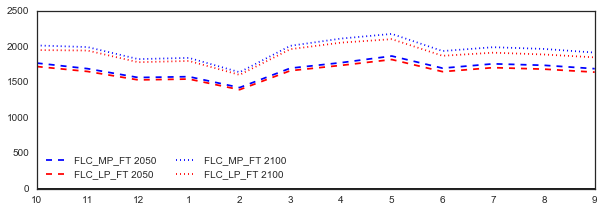

In [45]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)

table = make_table('root_storage')

plt.sca(ax1)
year = '2050'
table[['FLC_MP_FT_%s'%year,'FLC_LP_FT_%s'%year]].plot(color=['b','r'],ls='--',ax=ax1)
year = '2100'
table[['FLC_MP_FT_%s'%year,'FLC_LP_FT_%s'%year]].plot(color=['b','r'],ls=':',ax=ax1)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
#plt.ylim(-60,60)
plt.axhline(0,color='k')
#plt.ylabel('Change in Monthly\nStreamflow [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
#plt.text(1.2,45,'a',fontsize=16)

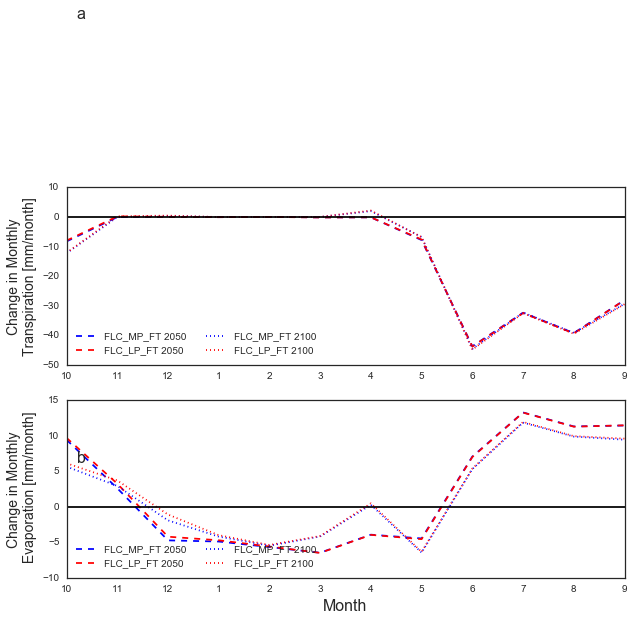

In [46]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

table = make_table('trans')

plt.sca(ax1)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax1)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax1)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\nTranspiration [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,67,'a',fontsize=16)

table = make_table('evap')

plt.sca(ax2)
year = '2050'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls='--',ax=ax2)
year = '2100'
table[['delta_MP_%s'%year,'delta_LP_%s'%year]].plot(color=['b','r'],ls=':',ax=ax2)
plt.legend(['FLC_MP_FT 2050','FLC_LP_FT 2050','FLC_MP_FT 2100','FLC_LP_FT 2100'],ncol=2,loc='lower left')
plt.axhline(0,color='k')
plt.ylabel('Change in Monthly\n Evaporation [mm/month]',fontsize=14)
plt.xlabel('')
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
plt.text(1.2,6.2,'b',fontsize=16)
ax2.set_xlabel('Month', fontsize=16)
#printfig = True
if printfig: plt.savefig('./figures/FLC_absolute_trans_evap_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/FLC_absolute_trans_evap_change.pdf',bbox_inches='tight')
#printfig = False

In [47]:
def get_year(index): return int(index.split('_')[-1])
def get_track(index): return index.split('_')[-2]

In [48]:
summary = pd.DataFrame()
summary['Streamflow'] = make_table('sf').filter(regex='delta*').sum().round(1)
summary['Evapotranspiration'] = make_table('et').filter(regex='delta*').sum().round(1)
summary['Transpiration'] = make_table('trans').filter(regex='delta*').sum().round(1)
summary['Snow Sublimation'] = make_table('snow_sub').filter(regex='delta*').sum().round(1)
summary['Snowfall'] = make_table('snowfall').filter(regex='delta*').sum().round(1)
summary['Precipitation'] = make_table('precip').filter(regex='delta*').sum().round(1)
summary['Evaporation'] = make_table('evap').filter(regex='delta*').sum().round(1)
summary['GW Loss'] = make_table('leakage').filter(regex='delta*').sum().round(1)
summary['track'] = summary.index.map(get_track)
summary['year'] = summary.index.map(get_year)

In [49]:
summary.loc[(summary.year==2000)|(summary.year==2050)|(summary.year==2100)]

,Streamflow,Evapotranspiration,Transpiration,Snow Sublimation,Snowfall,Precipitation,Evaporation,GW Loss,track,year
delta_MP_2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MP,2000
delta_LP_2000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LP,2000
delta_MP_2050,800.5,-135.5,-160.5,-27.2,1191.6,2355.8,25.0,1779.6,MP,2050
delta_LP_2050,779.4,-133.6,-160.1,-26.7,1136.0,2258.5,26.5,1698.3,LP,2050
delta_MP_2100,929.8,-139.7,-162.8,-37.6,1205.0,2818.5,23.1,2119.6,MP,2100
delta_LP_2100,871.0,-136.7,-163.0,-37.0,1025.6,2545.7,26.3,1899.6,LP,2100


In [50]:
summary['Streamflow'] = make_table_monthly('sf').filter(regex='delta*')

In [51]:
make_table('precip').filter(regex='Control').sum().round(1)[0]

1829.5

In [52]:
(summary.Streamflow+make_table('sf').filter(regex='Control').sum().round(0)[0]).round()

delta_MP_2000   NaN
delta_LP_2000   NaN
delta_MP_2010   NaN
delta_LP_2010   NaN
delta_MP_2020   NaN
delta_LP_2020   NaN
delta_MP_2030   NaN
delta_LP_2030   NaN
delta_MP_2040   NaN
delta_LP_2040   NaN
delta_MP_2050   NaN
delta_LP_2050   NaN
delta_MP_2060   NaN
delta_LP_2060   NaN
delta_MP_2070   NaN
delta_LP_2070   NaN
delta_MP_2080   NaN
delta_LP_2080   NaN
delta_MP_2090   NaN
delta_LP_2090   NaN
delta_MP_2100   NaN
delta_LP_2100   NaN
Name: Streamflow, dtype: float64

In [53]:
summary

,Streamflow,Evapotranspiration,Transpiration,Snow Sublimation,Snowfall,Precipitation,Evaporation,GW Loss,track,year
delta_MP_2000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MP,2000
delta_LP_2000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LP,2000
delta_MP_2010,NaN,-7.5,-11.3,-2.3,-77.0,-56.0,3.8,-41.0,MP,2010
delta_LP_2010,NaN,5.9,2.3,-2.0,-116.2,-104.2,3.5,-90.4,LP,2010
delta_MP_2020,NaN,2.7,-4.0,-4.6,-121.6,-77.7,6.7,-68.4,MP,2020
delta_LP_2020,NaN,16.5,12.1,-5.0,-150.5,-121.4,4.3,-112.8,LP,2020
delta_MP_2030,NaN,1.4,-6.8,-8.1,-177.4,-111.5,8.2,-99.2,MP,2030
delta_LP_2030,NaN,13.8,9.3,-8.1,-187.8,-142.1,4.5,-127.6,LP,2030
delta_MP_2040,NaN,-3.1,-12.5,-11.2,-205.1,-113.9,9.5,-104.6,MP,2040
delta_LP_2040,NaN,3.5,-2.0,-10.7,-197.8,-132.0,5.5,-105.6,LP,2040


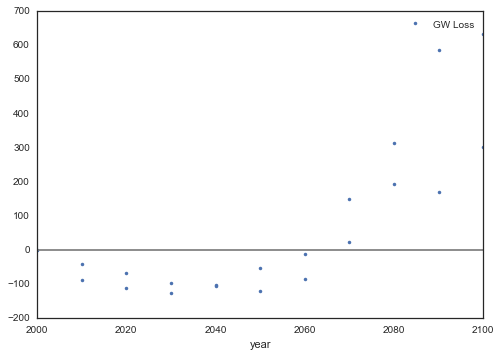

In [54]:
summary.plot('year','GW Loss',marker='.',linestyle='')
plt.axhline(0,color='0.5')

In [52]:
turb = pd.melt(summary[['Evapotranspiration','Transpiration','Evaporation','year','track']],
               id_vars=['year','track'])

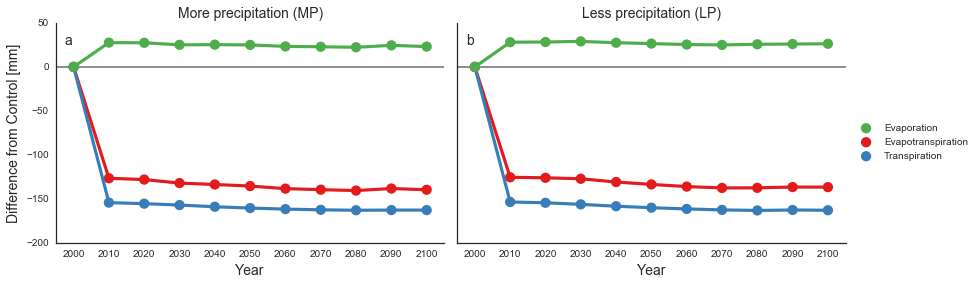

In [53]:
g = sns.FacetGrid(turb,col='track',size=4,aspect=(1.5),legend_out=True)
g = g.map(sns.pointplot,'year','value','variable',errwidth=0,palette='Set1')
g = g.add_legend()
titles = ['More precipitation (MP)','Less precipitation (LP)']
for ax,t in zip(g.axes[0],titles): 
    ax.axhline(0,color='0.5',zorder=0)
    ax.set_title(t,fontsize=14)
    ax.set_xlabel('Year',fontsize=14)
    
g.axes[0][0].text(-0.25,25,'a',fontsize=14)
g.axes[0][1].text(-0.25,25,'b',fontsize=14)
g.axes[0][0].set_ylabel('Difference from Control [mm]', fontsize = 14)
#printfig=True
if printfig: plt.savefig('./figures/annaul_vapor_fluxes.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/annaul_vapor_fluxes.pdf',bbox_inches='tight')
#printfig=False

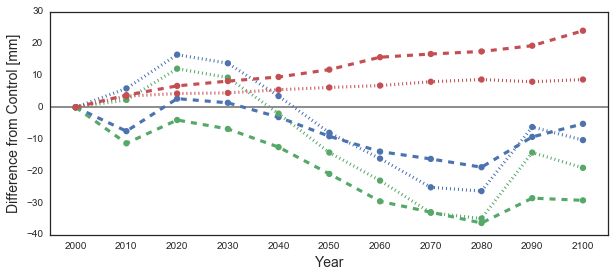

In [57]:
plt.figure(figsize=(10,4))
g = sns.pointplot('year','value',data=turb.loc[turb.track=='MP'],hue='variable',ls='track',
                  errwidth=0,linestyles=['--','--','--','--'],markers='.')

sns.pointplot('year','value',data=turb.loc[turb.track=='LP'],hue='variable',ls='track',
                  errwidth=0,linestyles=[':',':',':',':'],markers='.')
leg = g.axes.get_legend()
leg.set_title('')
new_labels = ['Evaporation + Transpiration', 'Transpiration','Evaporation','Snow Sublimation']
for t, l in zip(leg.texts, new_labels): t.set_text(l); t.set_fontsize(12)
plt.ylabel('Difference from Control [mm]', fontsize = 14)
plt.xlabel('Year', fontsize = 14)
plt.axhline(0,color='0.5',zorder=0)
g.legend_.remove()
#plt.draw_all()

In [58]:
summary

,Streamflow,Evapotranspiration,Transpiration,Snow Sublimation,Snowfall,Precipitation,Evaporation,GW Loss,track,year
delta_MP_2000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MP,2000
delta_LP_2000,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,LP,2000
delta_MP_2010,NaN,-7.5,-11.3,-2.3,-77.0,-56.0,3.8,-41.0,MP,2010
delta_LP_2010,NaN,5.9,2.3,-2.0,-116.2,-104.2,3.5,-90.4,LP,2010
delta_MP_2020,NaN,2.7,-4.0,-4.6,-121.6,-77.7,6.7,-68.4,MP,2020
delta_LP_2020,NaN,16.5,12.1,-5.0,-150.5,-121.4,4.3,-112.8,LP,2020
delta_MP_2030,NaN,1.4,-6.8,-8.1,-177.4,-111.5,8.2,-99.2,MP,2030
delta_LP_2030,NaN,13.8,9.3,-8.1,-187.8,-142.1,4.5,-127.6,LP,2030
delta_MP_2040,NaN,-3.1,-12.5,-11.2,-205.1,-113.9,9.5,-104.6,MP,2040
delta_LP_2040,NaN,3.5,-2.0,-10.7,-197.8,-132.0,5.5,-105.6,LP,2040


In [59]:
snowfall.filter(regex='delta*').sum().round(1)

NameError: name 'snowfall' is not defined

In [60]:
trans.filter(regex='delta*').sum().round(1)

NameError: name 'trans' is not defined

In [61]:
snow_sub.filter(regex='delta*').sum().round(1)

NameError: name 'snow_sub' is not defined

In [62]:
precip.filter(regex='delta*').sum().round(1)

NameError: name 'precip' is not defined

In [63]:
evap.filter(regex='delta*').sum().round(1)

NameError: name 'evap' is not defined

In [64]:
et.filter(regex='delta*').sum().round(1)

NameError: name 'et' is not defined

In [65]:
sf.filter(regex='delta*').sum().round(1)

NameError: name 'sf' is not defined

## Current Land Cover, More Precipitation

In [66]:
mp = df.loc[df.name=='CLC_MP_CT']
lp = df.loc[df.name=='CLC_LP_CT']
tmp = pd.concat([cont,mp,lp])
tmp.reset_index(inplace=True)

In [67]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

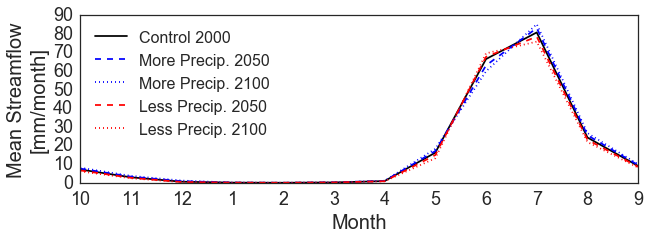

In [68]:
dat.loc[dat.decade==0].groupby(by='month').mean()['sf'].plot(c='k',ls='-', figsize=(10,3),label='Control 2000')

# more P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_MP_CT')].groupby(by='month').mean()['sf'].plot(c='b',ls='--',label='More Precip. 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_MP_CT')].groupby(by='month').mean()['sf'].plot(c='b',ls=':',label='More Precip. 2100')

# less P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_LP_CT')].groupby(by='month').mean()['sf'].plot(c='r',ls='--',label='Less Precip. 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_LP_CT')].groupby(by='month').mean()['sf'].plot(c='r',ls=':',label='Less Precip. 2100')

plt.legend(loc='upper left', fontsize = 16)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 20)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0)
ax = plt.gca()
[tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
[tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];

if printfig: plt.savefig('./figures/CLC_Precip_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/CLC_Precip_change.pdf',bbox_inches='tight')

In [69]:
def make_table(var,lc,precip,temp):
    '''
    var - variable of interest
    lc - land cover specification
    precip - precipitation specification
    temp - temperature specification'''
    table = pd.DataFrame()
    decades = dat.loc[dat.name=='%s_%s_%s'%(lc,precip,temp)].decade.unique()
    table['Control'] = dat.loc[dat.decade==0].groupby('month').mean()[var]
    for decade in decades:
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['%s_%s_%s_%s'%(lc,precip,temp,year)] = dat.loc[(dat.name=='%s_%s_%s'%(lc,precip,temp)) & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)] = table['%s_%s_%s_%s'%(lc,precip,temp,year)]-table['Control']
        table['percent_%s_%s_%s_%s'%(lc,precip,temp,year)] = (table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)]/table['Control'])*100.

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC
    return table

In [70]:
sf = pd.concat([make_table('sf','CLC','MP','CT'),make_table('sf','CLC','LP','CT')])
et = pd.concat([make_table('et','CLC','MP','CT'),make_table('et','CLC','LP','CT')])
p = pd.concat([make_table('precip','CLC','MP','CT'),make_table('precip','CLC','LP','CT')])

In [71]:
p.filter(regex='delta*').sum().round()

delta_CLC_LP_CT_2050   -123.0
delta_CLC_LP_CT_2100   -247.0
delta_CLC_MP_CT_2050    123.0
delta_CLC_MP_CT_2100    247.0
dtype: float64

In [72]:
sf.filter(regex='delta*').sum().round(1)

delta_CLC_LP_CT_2050    -5.1
delta_CLC_LP_CT_2100   -10.2
delta_CLC_MP_CT_2050     2.6
delta_CLC_MP_CT_2100     5.8
dtype: float64

In [73]:
et.filter(regex='delta*').sum().round(1)

delta_CLC_LP_CT_2050   -4.2
delta_CLC_LP_CT_2100   -8.0
delta_CLC_MP_CT_2050    4.4
delta_CLC_MP_CT_2100    8.1
dtype: float64

## Current Land Cover, Future Precipitation, Future Temperature

In [74]:
mp = df.loc[df.name=='CLC_MP_FT']
lp = df.loc[df.name=='CLC_LP_FT']
tmp = pd.concat([cont,mp,lp])
tmp.reset_index(inplace=True)

In [75]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

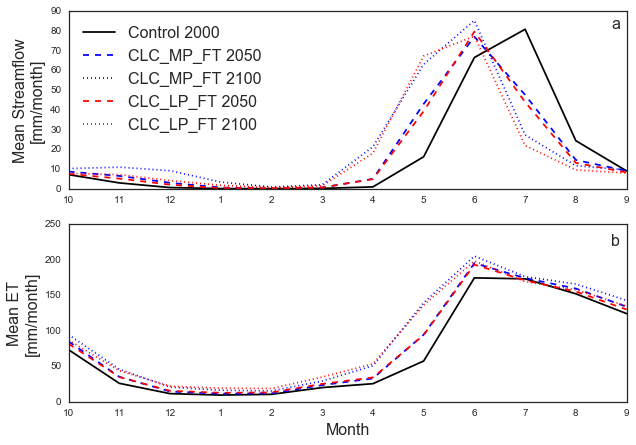

In [86]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

plt.sca(ax1)
dat.loc[dat.decade==0].groupby(by='month').mean()['sf'].plot(c='k',ax=ax1,ls='-',label='Control 2000')

# more P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['sf'].plot(c='b',ax=ax1,ls='--',label='CLC_MP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['sf'].plot(c='b',ax=ax1,ls=':',label='CLC_MP_FT 2100')

# less P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ax=ax1,ls='--',label='CLC_LP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ax=ax1,ls=':',label='CLC_LP_FT 2100')

plt.legend(loc='upper left',ncol=1, fontsize=16)
plt.xlabel('', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);

plt.sca(ax2)
dat.loc[dat.decade==0].groupby(by='month').mean()['et'].plot(c='k',ax=ax2,ls='-',label='Control 2000')

# more P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['et'].plot(c='b',ax=ax2,ls='--',label='CLC_MP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_MP_FT')].groupby(by='month').mean()['et'].plot(c='b',ax=ax2,ls=':',label='CLC_MP_FT 2100')

# less P
dat.loc[(dat.decade==5) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['et'].plot(c='r',ax=ax2,ls='--',label='CLC_LP_FT 2050')
dat.loc[(dat.decade==10) & (dat.name == 'CLC_LP_FT')].groupby(by='month').mean()['et'].plot(c='r',ax=ax2,ls=':',label='CLC_LP_FT 2100')

plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
ax1.text(11.7,81,'a', fontsize = 16)
ax2.text(11.7,220,'b', fontsize = 16)

printfig = True
if printfig: plt.savefig('./figures/CLC_Precip_airTemp_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/CLC_Precip_airTemp_change.pdf',bbox_inches='tight')
printfig = False

In [47]:
sf_mp = make_table('sf','CLC','MP','FT')
sf_lp = make_table('sf','CLC','LP','FT')
et_mp = make_table('et','CLC','MP','FT')
et_lp = make_table('et','CLC','LP','FT')

In [48]:
et_mp.filter(regex='delta*').sum()

delta_CLC_MP_FT_2050    113.897107
delta_CLC_MP_FT_2100    244.220277
dtype: float64

## Current Land Cover, Current Precipitation, Future Temperature

In [251]:
p = df.loc[df.name=='CLC_CP_FT']
tmp = pd.concat([cont,p])
tmp.reset_index(inplace=True)

In [252]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    out['leakage'] = tmp.leakage[i]
    out['trans'] = tmp.trans[i]
    out['evap'] = tmp.evap[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

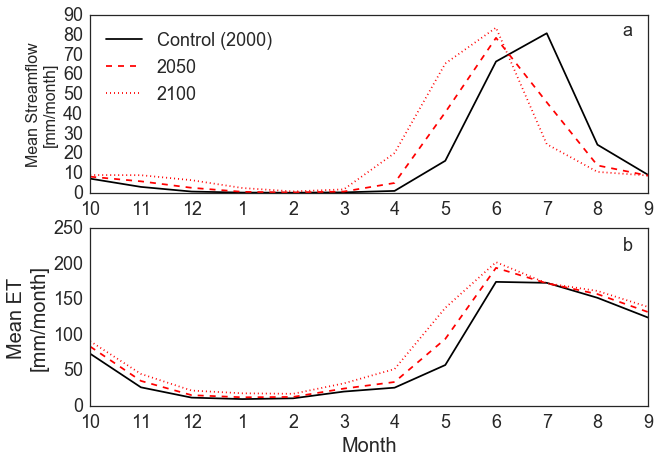

In [256]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.sca(ax1)
dat.loc[dat.decade==0].groupby(by='month').mean()['sf'].plot(c='k',ls='-',label='Control (2000)',ax=ax1)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls='--',label='2050',ax=ax1)
dat.loc[(dat.decade==10) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls=':',label='2100',ax=ax1)
plt.legend(loc='upper left', fontsize = 18)
plt.xlabel('', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,80,'a',fontsize=18)

plt.sca(ax2)
dat.loc[dat.decade==0].groupby(by='month').mean()['et'].plot(c='k',ls='-',label='Control 2000',ax=ax2)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax2)
dat.loc[(dat.decade==10) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax2)
#plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Month', fontsize = 20)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 20)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,220,'b',fontsize=18)

for ax in [ax1,ax2]:
    [tick.label.set_fontsize(18) for tick in ax.xaxis.get_major_ticks()];
    [tick.label.set_fontsize(18) for tick in ax.yaxis.get_major_ticks()];

if printfig: plt.savefig('./figures/CLC_temp_change.png',dpi=300,bbox_inches='tight')
if printfig: plt.savefig('./figures/CLC_temp_change.pdf',bbox_inches='tight')

In [196]:
var = 'sf'
xc = ((dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()[var] - 
 dat.loc[dat.decade==0].groupby(by='month').mean()[var]) / dat.loc[dat.decade==0].groupby(by='month').mean()[var]).as_matrix() * 100.
pd.DataFrame({var:xc},index=months_as_water_year)

,sf
10,13.965411
11,95.441277
12,317.747889
1,470.410023
2,490.572353
3,230.096207
4,431.428499
5,151.615002
6,18.047973
7,-43.276583


In [193]:
xc

array([ 13.7861826 ,  34.72308111,  30.11380237,  26.46105545,
        18.75959015,  21.03350228,  31.24974832,  63.97806839,
        11.31901888,  -0.35972646,   3.44270328,   6.25075036])

In [301]:
sf = make_table('sf','CLC','CP','FT')
et = make_table('et','CLC','CP','FT')
precip = make_table('precip','CLC','CP','FT')
leakage = make_table('leakage','CLC','CP','FT')
trans = make_table('trans','CLC','CP','FT')
evap = make_table('evap','CLC','CP','FT')

In [290]:
sf.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050   -10.2
delta_CLC_CP_FT_2100    21.8
dtype: float64

In [293]:
et.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050     -4.9
delta_CLC_CP_FT_2100    118.0
dtype: float64

In [297]:
precip.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050   -0.0
delta_CLC_CP_FT_2100   -0.0
dtype: float64

In [298]:
leakage.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050     9.0
delta_CLC_CP_FT_2100   -96.5
dtype: float64

In [305]:
trans.filter(regex='delta*')

,delta_CLC_CP_FT_2050,delta_CLC_CP_FT_2100
month,,
1,0.872674,10.123525
2,-0.560993,8.837521
3,-0.656971,2.789218
4,-0.637755,2.362562
5,-0.400201,1.528322
6,-0.855941,4.125000
7,-3.510044,12.894899
8,-3.850447,47.010800
9,5.146035,13.339741


In [123]:
make_table('precip','CLC','LP','CT')

,Control
month,
1,142.530377
2,117.628514
3,132.864506
4,135.977248
5,132.864512
6,202.655266
7,333.553863
8,236.215945
9,78.372818


In [303]:
trans.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050     -4.3
delta_CLC_CP_FT_2100    117.4
dtype: float64

In [302]:
evap.filter(regex='delta*').sum().round(1)

delta_CLC_CP_FT_2050   -0.6
delta_CLC_CP_FT_2100    0.6
dtype: float64

In [241]:
et = make_table('et')

In [242]:
et.sum()

Control             973.820805
CLC_CP_FT_2050      965.804232
CLC_CP_FT_2100     1088.674140
delta_FT_2050        -8.016573
percent_FT_2050     -39.667621
delta_FT_2100       114.853335
percent_FT_2100     248.166251
dtype: float64

In [244]:
et

,Control,CLC_CP_FT_2050,CLC_CP_FT_2100,delta_FT_2050,percent_FT_2050,delta_FT_2100,percent_FT_2100
month,,,,,,,
1,82.806680,83.415244,90.948047,0.608564,0.734921,8.141367,9.831776
2,35.586848,35.049059,44.908199,-0.537789,-1.511202,9.321351,26.193246
3,16.096464,14.967306,21.435405,-1.129158,-7.014944,5.338941,33.168408
4,13.127597,11.981318,17.615976,-1.146279,-8.731825,4.488379,34.190408
5,13.386144,12.496081,16.892543,-0.890063,-6.649140,3.506399,26.194238
6,25.431643,24.236598,31.566223,-1.195046,-4.699050,6.134580,24.121838
7,37.246700,33.487576,51.728753,-3.759124,-10.092503,14.482053,38.881440
8,97.636320,94.177139,137.914725,-3.459181,-3.542924,40.278405,41.253506
9,190.742005,194.250620,202.240362,3.508615,1.839456,11.498357,6.028225


## Make a table of changes at 2050 and 2100

In [136]:
names = df.name.unique()[1:]

In [137]:
tmp = cont.copy()

for name in names:
    tmp = pd.concat([tmp,df.loc[(df.name==name) & (df.decade==5) | (df.decade==10)]])

tmp.reset_index(inplace=True)

In [138]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    out['precip'] = tmp.precip[i]
    out['leak'] = tmp.leakage[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

In [139]:
def make_table(var,lc,precip,temp):
    '''
    var - variable of interest
    lc - land cover specification
    precip - precipitation specification
    temp - temperature specification'''
    table = pd.DataFrame()
    decades = dat.loc[dat.name=='%s_%s_%s'%(lc,precip,temp)].decade.unique()
    table['Control'] = dat.loc[(dat.year==2000) & (dat.name == 'CLC_CP_CT')].groupby('month').mean()[var]
    for decade in decades:
        #make year
        year = (decade*10) + 2000
        
        # pull the data into the data frame
        table['%s_%s_%s_%s'%(lc,precip,temp,year)] = dat.loc[(dat.name=='%s_%s_%s'%(lc,precip,temp)) & (dat.decade==decade)].groupby('month').mean()[var]
        
        # compute changes
        table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)] = table['%s_%s_%s_%s'%(lc,precip,temp,year)]-table['Control']
        table['percent_%s_%s_%s_%s'%(lc,precip,temp,year)] = (table['delta_%s_%s_%s_%s'%(lc,precip,temp,year)]/table['Control'])*100.

    #del table['Control']; del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    #del table['FLC
    return table

In [200]:
# run through each name and pull out the difference from control
var = 'sf'
tabs = []
for name in names:
    lc = name.split('_')[0]
    precip = name.split('_')[1]
    temp = name.split('_')[2]
        
    tabs.append(make_table(var,lc,precip,temp).filter(regex='delta*').sum().round(2).sort_index())

l2050 = []
l2100 = []
for tab in tabs:
    l2050.append(tab[0])
    l2100.append(tab[1])

table = pd.DataFrame({'2050':l2050,'2100':l2100},index=names)

# for percents
(table/dat.loc[(dat.name=='CLC_CP_CT')].groupby('month').mean()[var].sum()).round(2)*100.

# for differences from control in mm
#table.round()

,2050,2100
FLC_LP_FT,1.0,29.0
FLC_MP_FT,6.0,44.0
CLC_LP_CT,-2.0,-5.0
CLC_MP_CT,1.0,3.0
CLC_CP_FT,1.0,16.0
CLC_MP_FT,3.0,22.0
CLC_LP_FT,-2.0,8.0


In [144]:
# run through each name and pull out the difference from control
var = 'et'
tabs = []
for name in names:
    lc = name.split('_')[0]
    precip = name.split('_')[1]
    temp = name.split('_')[2]
        
    tabs.append(make_table(var,lc,precip,temp).filter(regex='delta*').sum().round(1).sort_index())

In [403]:
l2050 = []
l2100 = []
for tab in tabs:
    l2050.append(tab[0])
    l2100.append(tab[1])

In [404]:
table = pd.DataFrame({'2050':l2050,'2100':l2100},index=names)

In [405]:
table

,2050,2100
FLC_LP_FT,-129.4,-131.7
FLC_MP_FT,-130.5,-126.6
CLC_LP_CT,-125.6,-129.4
CLC_MP_CT,-117.0,-113.3
CLC_CP_FT,-13.2,109.6
CLC_MP_FT,-18.4,96.1
CLC_LP_FT,-18.4,96.1


## Compare increasing temperature to coupled land cover change

In [249]:
c = df.loc[df.name=='CLC_CP_FT']
mp = df.loc[df.name=='FLC_MP_FT']
lp = df.loc[df.name=='FLC_LP_FT']
tmp = pd.concat([c,mp,lp])
tmp.reset_index(inplace=True)

In [250]:
dat = pd.DataFrame()
for i in range(len(tmp)):
    out = pd.DataFrame()
    
    # populate the DF
    out['sf'] = tmp.streamflow[i]
    out['et'] = tmp.et[i]
    
    # resample the data frame to monthly
    out.index = pd.DatetimeIndex(dates)
    out = out.resample('M').sum()
    out['month'] = out.index.map(get_mowy)
    
    # add the ID variables
    out['name'] = tmp.name[i]
    out['year'] = tmp.year[i]
    out['decade'] = tmp.decade[i]
    out['track'] = tmp.track[i]
    out['scenario'] = tmp.scenario[i]
    
    dat = pd.concat([dat,out])

In [259]:
def make_table(var):
    table = pd.DataFrame()
    table['CLC_CP_FT_2050'] = dat.loc[(dat.decade==5) & (dat.name=='CLC_CP_FT')].groupby('month').mean()[var]
    table['CLC_CP_FT_2100'] = dat.loc[(dat.decade==10) & (dat.name=='CLC_CP_FT')].groupby('month').mean()[var]
    table['FLC_LP_FT_2050'] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==5)].groupby('month').mean()[var]
    table['FLC_MP_FT_2050'] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==5)].groupby('month').mean()[var]
    table['FLC_LP_FT_2100'] = dat.loc[(dat.name=='FLC_LP_FT') & (dat.decade==10)].groupby('month').mean()[var]
    table['FLC_MP_FT_2100'] = dat.loc[(dat.name=='FLC_MP_FT') & (dat.decade==10)].groupby('month').mean()[var]

    table['delta_MP_2050'] = table.FLC_MP_FT_2050-table.CLC_CP_FT_2050
    table['delta_LP_2050'] = table.FLC_LP_FT_2050-table.CLC_CP_FT_2050
    table['percent_MP_2050'] = (table.delta_MP_2050/table.CLC_CP_FT_2050)*100.
    table['percent_LP_2050'] = (table.delta_LP_2050/table.CLC_CP_FT_2050)*100.

    table['delta_MP_2100'] = table.FLC_MP_FT_2100-table.CLC_CP_FT_2100
    table['delta_LP_2100'] = table.FLC_LP_FT_2100-table.CLC_CP_FT_2100
    table['percent_MP_2100'] = (table.delta_MP_2100/table.CLC_CP_FT_2100)*100.
    table['percent_LP_2100'] = (table.delta_LP_2100/table.CLC_CP_FT_2100)*100.

    del table['FLC_LP_FT_2050']; del table['FLC_MP_FT_2050'];
    del table['FLC_LP_FT_2100']; del table['FLC_MP_FT_2100'];
    return table

In [260]:
sf = make_table('sf')
et = make_table('et')

In [261]:
sf.sum()

CLC_CP_FT_2050      210.256610
CLC_CP_FT_2100      242.271116
delta_MP_2050        10.604912
delta_LP_2050         0.899271
percent_MP_2050     202.244273
percent_LP_2050     151.842952
delta_MP_2100        58.067926
delta_LP_2100        27.880454
percent_MP_2100    1233.546714
percent_LP_2100     712.585101
dtype: float64

In [258]:
et.sum()

delta_MP_2050     -117.228516
delta_LP_2050     -116.150383
percent_MP_2050   -116.694876
percent_LP_2050    -82.508162
delta_MP_2100     -236.248695
delta_LP_2100     -241.295456
percent_MP_2100   -266.505401
percent_LP_2100   -219.677131
dtype: float64

In [ ]:
fig = plt.figure(figsize=(10,7))
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)
plt.sca(ax1)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['sf'].plot(c='k',ls='-',label='Control 2000',ax=ax1)

dat.loc[(dat.decade==5) & (dat.name == 'FLC_FP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax1)
dat.loc[(dat.decade==10) & (dat.name == 'FLC_FP_FT')].groupby(by='month').mean()['sf'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax1)
plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('', fontsize = 16)
plt.ylabel('Mean Streamflow\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,80,'a',fontsize=14)

plt.sca(ax2)
dat.loc[dat.decade==0].groupby(by='month').mean()['et'].plot(c='k',ls='-',label='Control 2000',ax=ax2)
dat.loc[(dat.decade==5) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls='--',label='CLC_CP_FT 2050',ax=ax2)
dat.loc[(dat.decade==10) & (dat.name == 'CLC_CP_FT')].groupby(by='month').mean()['et'].plot(c='r',ls=':',label='CLC_CP_FT 2100',ax=ax2)
plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Mean ET\n[mm/month]', fontsize = 16)
plt.xticks(np.arange(1,13),months_as_water_year,rotation=0);
plt.text(11.5,220,'b',fontsize=14)

#plt.savefig('./figures/FLC_vs_temp_change.png',dpi=300,bbox_inches='tight')
#plt.savefig('./figures/FLC_vs_temp_change.pdf',bbox_inches='tight')

## 2050 Land Cover Coupled vs more T and LP and MP

In [113]:
FT = df.loc[(df.name=='CLC_CP_FT') & (df.decade==5)]
MP = df.loc[(df.name=='CLC_MP_CT') & (df.decade==5)]
LP = df.loc[(df.name=='CLC_LP_CT') & (df.decade==5)]
FLC_MP = df.loc[(df.name=='FLC_MP_FT') & (df.decade==5)]
FLC_LP = df.loc[(df.name=='FLC_LP_FT') & (df.decade==5)]

tmp = pd.concat([cont,FT,MP,LP,FLC_MP,FLC_LP])
tmp.reset_index(inplace=True)

In [114]:
dowys = []
names = []
vals = []
decades = []

for i in range(len(tmp)):
    sf = tmp.streamflow[i] # pull out the streamflow array
    for val,d in zip(sf,dowy):
        names.append(tmp.name[i])
        dowys.append(d)
        decades.append(tmp.decade[i])
        vals.append(val)
        
sf = pd.DataFrame({'dowy':dowys,'name':names,'decade':decades,'val':vals})

(0, 4.5)

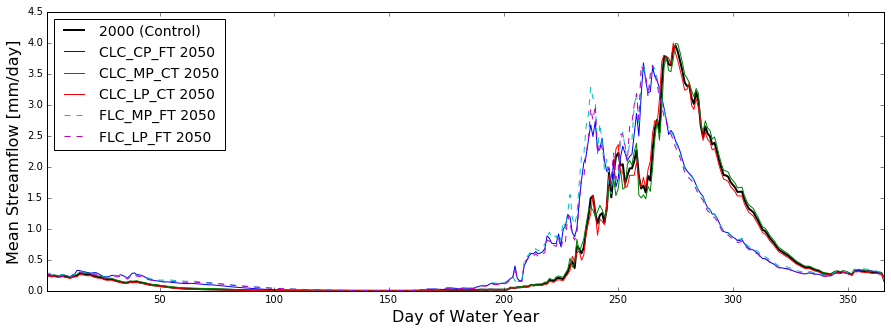

In [115]:
sf.loc[sf.decade==0].groupby(by='dowy').mean()['val'].plot(c='k',ls='-',lw=2 ,figsize=(15,5),label='2000 (Control)')

sf.loc[(sf.decade==5) & (sf.name == 'CLC_CP_FT')].groupby(by='dowy').mean()['val'].plot(label='CLC_CP_FT 2050')
sf.loc[(sf.decade==5) & (sf.name == 'CLC_MP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_MP_CT 2050')
sf.loc[(sf.decade==5) & (sf.name == 'CLC_LP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_LP_CT 2050')
sf.loc[(sf.decade==5) & (sf.name == 'FLC_MP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_MP_FT 2050',ls='--')
sf.loc[(sf.decade==5) & (sf.name == 'FLC_LP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_LP_FT 2050',ls='--')

l = plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Day of Water Year', fontsize = 16)
plt.ylabel('Mean Streamflow [mm/day]', fontsize = 16)
plt.ylim(0,4.5)

## 2100 Land Cover Coupled vs more T and LP and MP

In [107]:
FT = df.loc[(df.name=='CLC_CP_FT') & (df.decade==10)]
MP = df.loc[(df.name=='CLC_MP_CT') & (df.decade==10)]
LP = df.loc[(df.name=='CLC_LP_CT') & (df.decade==10)]
FLC_MP = df.loc[(df.name=='FLC_MP_FT') & (df.decade==10)]
FLC_LP = df.loc[(df.name=='FLC_LP_FT') & (df.decade==10)]

tmp = pd.concat([cont,FT,MP,LP,FLC_MP,FLC_LP])
tmp.reset_index(inplace=True)

In [108]:
dowys = []
names = []
vals = []
decades = []

for i in range(len(tmp)):
    sf = tmp.streamflow[i] # pull out the streamflow array
    for val,d in zip(sf,dowy):
        names.append(tmp.name[i])
        dowys.append(d)
        decades.append(tmp.decade[i])
        vals.append(val)
        
sf = pd.DataFrame({'dowy':dowys,'name':names,'decade':decades,'val':vals})

(0, 4.5)

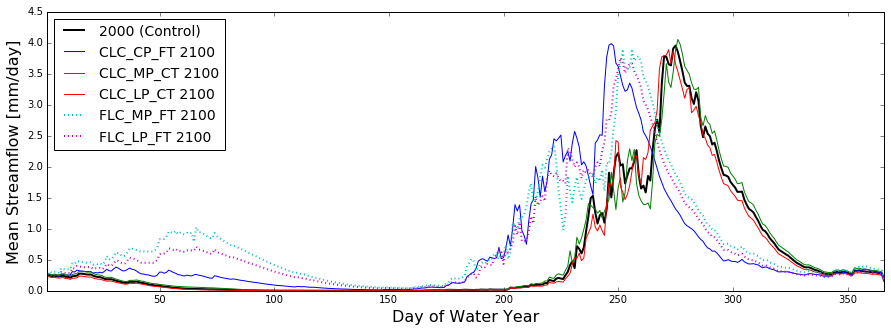

In [112]:
sf.loc[sf.decade==0].groupby(by='dowy').mean()['val'].plot(c='k',ls='-',lw=2 ,figsize=(15,5),label='2000 (Control)')

sf.loc[(sf.decade==10) & (sf.name == 'CLC_CP_FT')].groupby(by='dowy').mean()['val'].plot(label='CLC_CP_FT 2100')
sf.loc[(sf.decade==10) & (sf.name == 'CLC_MP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_MP_CT 2100')
sf.loc[(sf.decade==10) & (sf.name == 'CLC_LP_CT')].groupby(by='dowy').mean()['val'].plot(label='CLC_LP_CT 2100')
sf.loc[(sf.decade==10) & (sf.name == 'FLC_MP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_MP_FT 2100',ls=':',lw=2)
sf.loc[(sf.decade==10) & (sf.name == 'FLC_LP_FT')].groupby(by='dowy').mean()['val'].plot(label='FLC_LP_FT 2100',ls=':',lw=2)

l = plt.legend(loc='upper left', fontsize = 14)
plt.xlabel('Day of Water Year', fontsize = 16)
plt.ylabel('Mean Streamflow [mm/day]', fontsize = 16)
plt.ylim(0,4.5)